In [49]:
import keras
from keras.models import Sequential, save_model
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, Convolution2D
from keras.layers import Activation, Dropout, Flatten, Dense

from keras.preprocessing.image import ImageDataGenerator

In [50]:
inputShape = (128, 128, 1)

## CNN Layers

In [51]:
model = Sequential()
model.add(Conv2D(filters = 4, 
                 kernel_size = (3, 3), 
                 input_shape= inputShape, 
                 strides=1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(8, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

## FCC Layers

In [52]:
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(26))
model.add(Activation('softmax'))

## Compile

In [53]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 126, 126, 4)       40        
_________________________________________________________________
activation_45 (Activation)   (None, 126, 126, 4)       0         
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 63, 63, 4)         0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 61, 61, 8)         296       
_________________________________________________________________
activation_46 (Activation)   (None, 61, 61, 8)         0         
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 30, 30, 8)         0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 28, 28, 16)        1168      
__________

## Dataset

In [54]:
batch_size = 16

train_datagen = ImageDataGenerator()

test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
        'dataset/train',  # this is the target directory
        target_size=(128, 128),  # all images will be resized to 150x150
        batch_size=batch_size,
        color_mode='grayscale',
        class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels

validation_generator = test_datagen.flow_from_directory(
        'dataset/validation',
        target_size=(128, 128),  # all images will be resized to 150x150
        batch_size=batch_size,
        color_mode='grayscale',
        class_mode='categorical')

Found 187586 images belonging to 26 classes.
Found 20777 images belonging to 26 classes.


## Train

In [55]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)
model.save_weights('model.h5')  # always save your weights after training or during training

Epoch 1/10
125/125 [==============================] - 9s 76ms/step - loss: 3.0281 - acc: 0.1550 - val_loss: 2.5455 - val_acc: 0.2787
Epoch 2/10
125/125 [==============================] - 9s 70ms/step - loss: 2.4608 - acc: 0.3120 - val_loss: 2.0612 - val_acc: 0.4625
Epoch 3/10
125/125 [==============================] - 9s 70ms/step - loss: 1.9952 - acc: 0.4345 - val_loss: 1.4516 - val_acc: 0.6475
Epoch 4/10
125/125 [==============================] - 9s 70ms/step - loss: 1.5663 - acc: 0.5345 - val_loss: 1.0264 - val_acc: 0.6850
Epoch 5/10
125/125 [==============================] - 9s 71ms/step - loss: 1.2791 - acc: 0.6230 - val_loss: 0.8910 - val_acc: 0.7612
Epoch 6/10
125/125 [==============================] - 9s 71ms/step - loss: 1.1037 - acc: 0.6750 - val_loss: 0.6555 - val_acc: 0.8213
Epoch 7/10
125/125 [==============================] - 9s 72ms/step - loss: 0.9592 - acc: 0.7100 - val_loss: 0.5313 - val_acc: 0.8462
Epoch 8/10
125/125 [==============================] - 9s 72ms/step - 

## Score

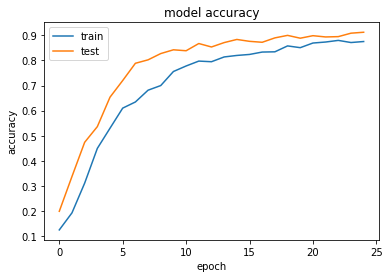

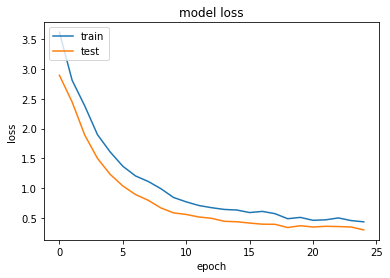

In [22]:
import matplotlib.pyplot as plt
import numpy

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Saving Model

In [23]:
model_yaml = model.to_yaml()
with open("bin/model2.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
save_model(model, 'bin/model2.h5')